# Heart Disease Prediction Using Machine Learning

In [83]:
![HEART_STRESS_NoMask.gif](attachment:4b5ce791-d5c1-4e38-9832-05a81920fc9c.gif)

'[HEART_STRESS_NoMask.gif]' is not recognized as an internal or external command,
operable program or batch file.


# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

## Step 1: Import modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Susseccfully')


All Modules Loaded Susseccfully


## Step 2: Loading Data

In [6]:
url = '''https://github.com/AG-2811/Heart-Disease-Prediction/blob/main/heart%20(1).csv?raw=true'''
df = pd.read_csv(url)
print('Done')


Done


## Step 3: Understanding Data using EDA

In [3]:
#3.1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 3.2
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# 3.3
df.shape

(303, 14)

In [6]:
# 3.4
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# 3.5
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 column description
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [8]:
# Domain Knowledge is required for this level of project


###### 3.7 Checking Null Counts 

In [9]:
df.isna().sum()
# No null values found
# in case of null: remove, fill, replace, drap

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8: Column stats 

In [10]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


###### 3.9: Each column univariate analysis

In [11]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('................', end = '\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
................

Column_sex [1 0]
................

Column_cp [3 2 1 0]
................

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
................

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 21

###### 3.10: Each numerical features Hist Plot Distribution

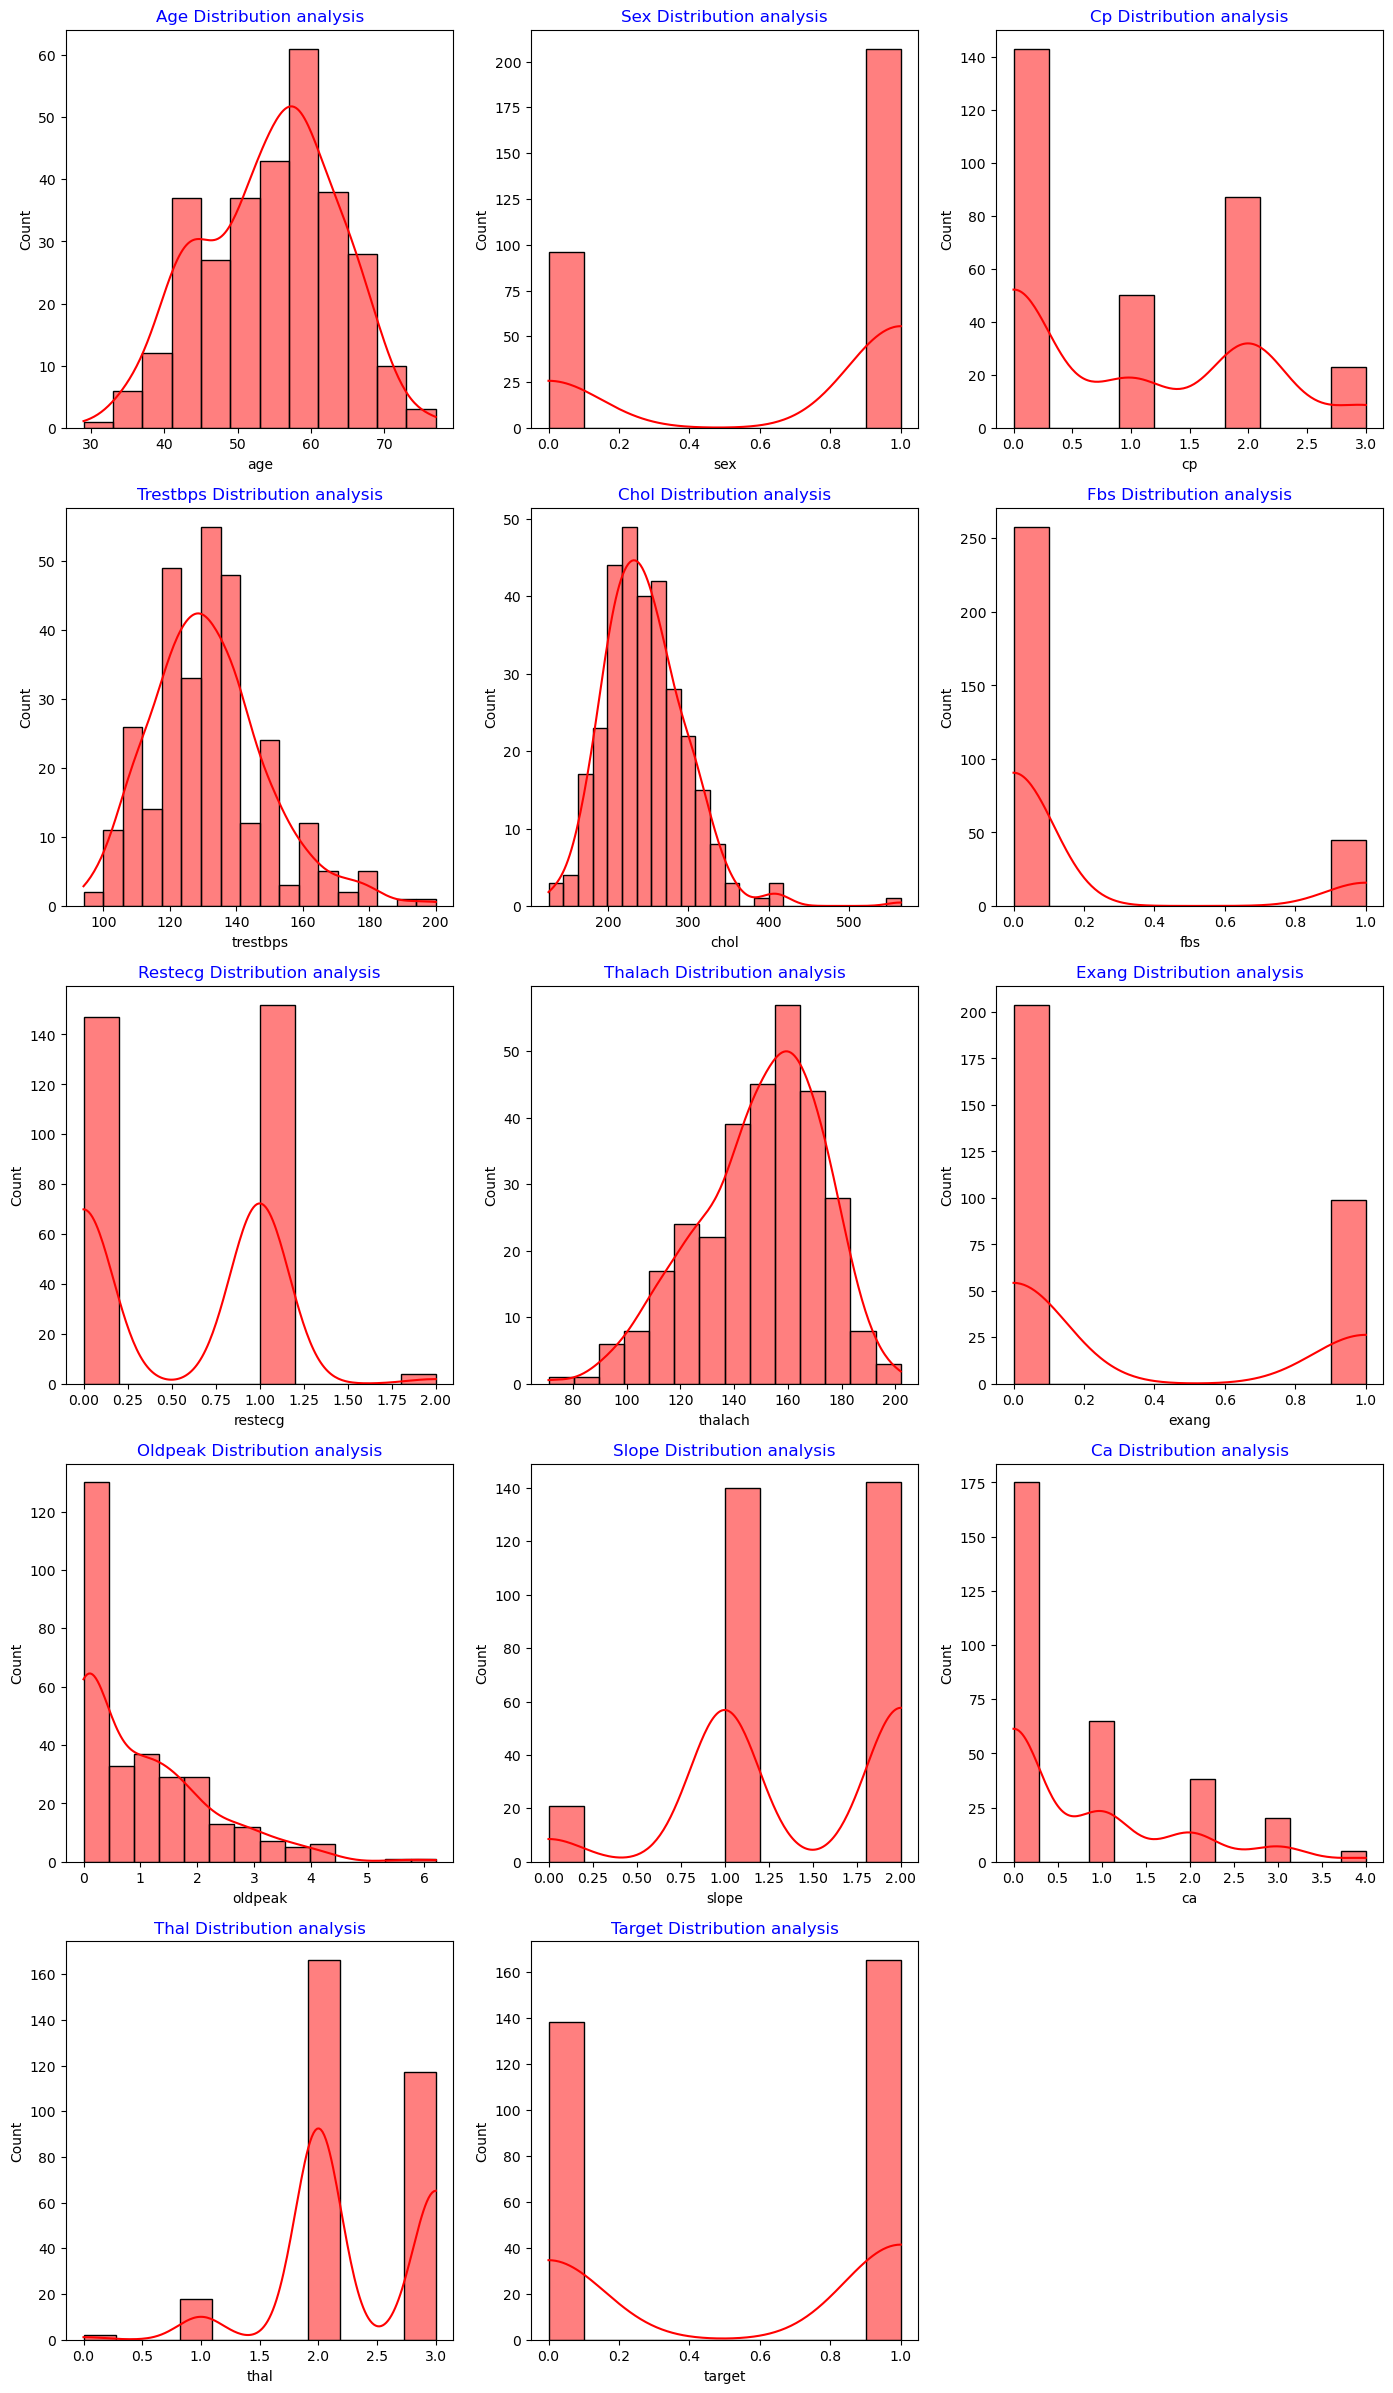

In [12]:
r = 5
c= 3
plt.figure(figsize = (17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j.title()} Distribution analysis', color = 'blue')
    sns.histplot(df[j],kde = True, color = 'r')
plt.savefig('All Numerical Hist plot Distribution.jpeg',dpi = 500)
plt.show()

In [13]:
# Target col not that much imbalance, found we need to balance using sampling

###### 3.11: Bivariate Analysis, To check correlation of feature with target

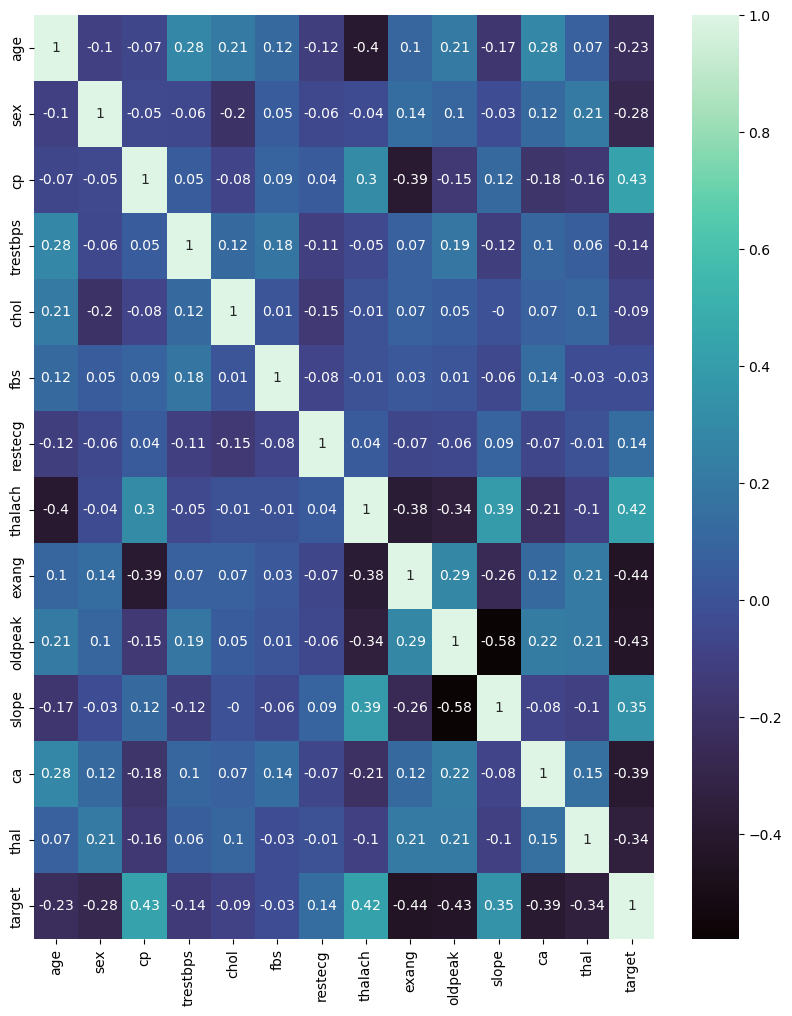

In [14]:
plt.figure(figsize = (10,12))
sns.heatmap(df.corr().round(2),cmap = 'mako', annot = True)
plt.show()

In [15]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [16]:
df.corr()['target'].sort_values(ascending = False).reset_index()

,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


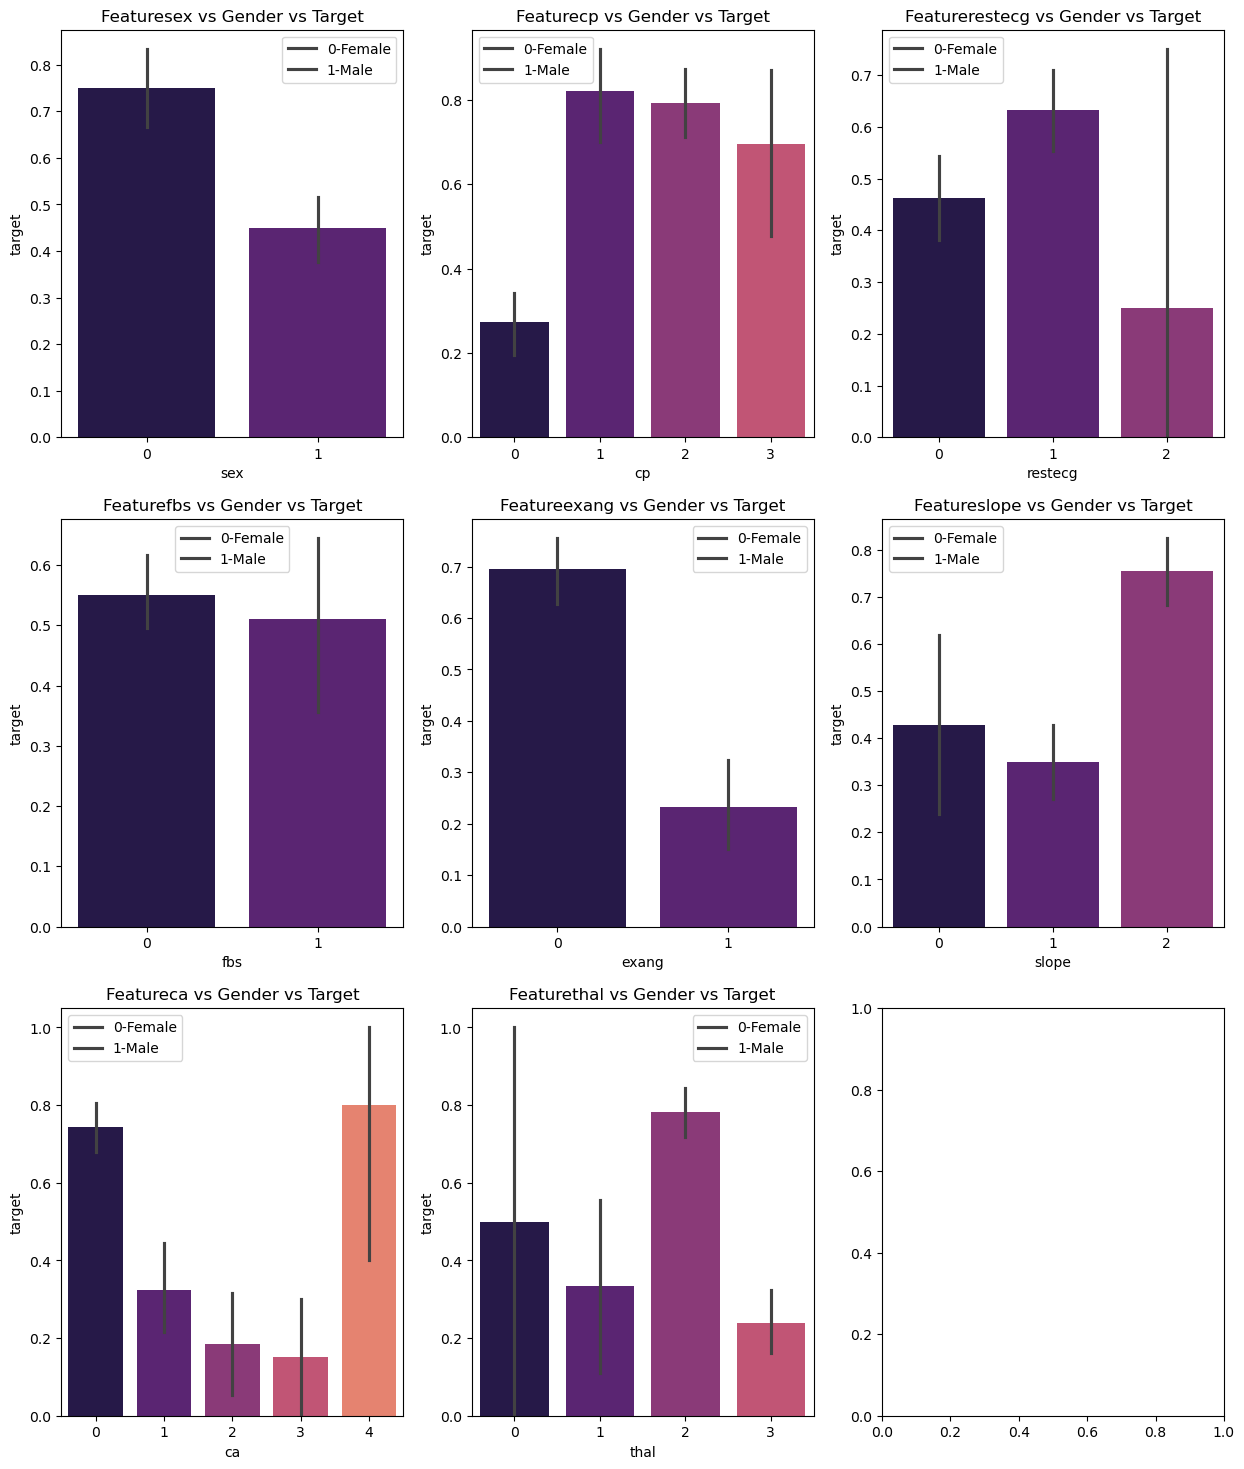

In [17]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope','ca','thal']
plt.figure(figsize = (15,18))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature{x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x= x_col[i],y = 'target', palette=sns.color_palette('magma'))
        plt.legend(['0-Female','1-Male'])
    except:
        pass
plt.show()

### 3.13
fearures vs target 

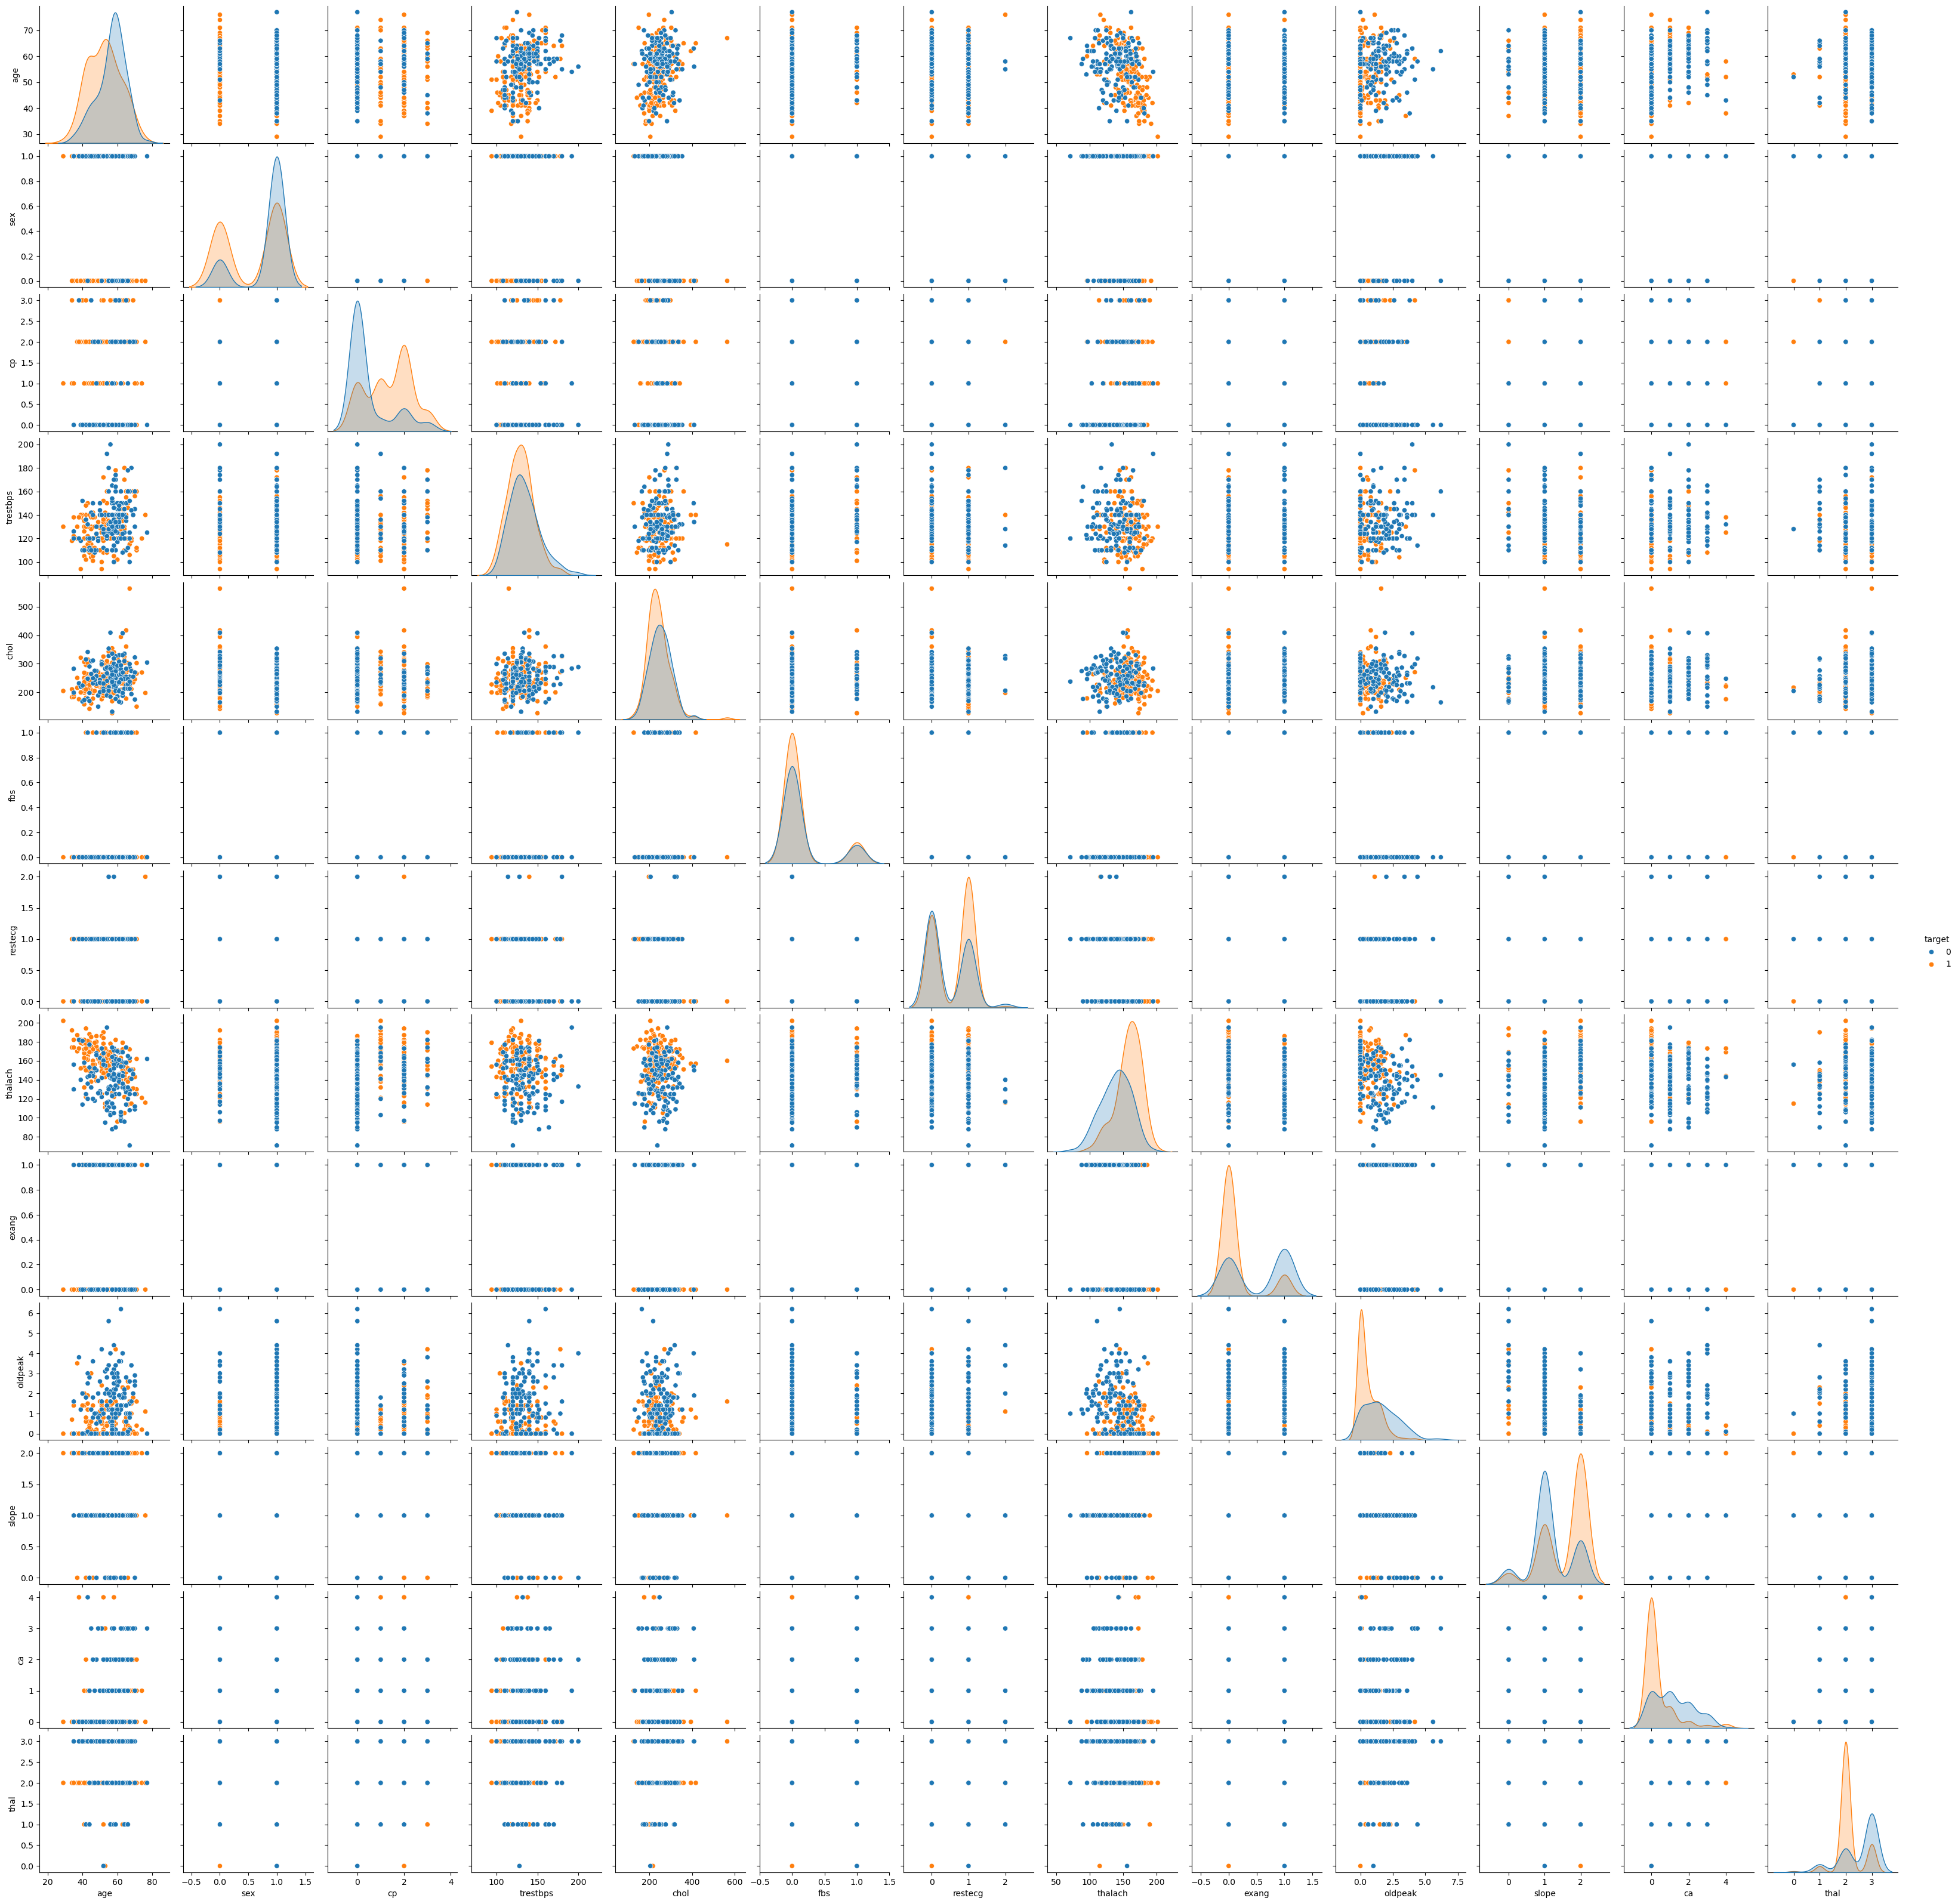

In [18]:
sns.pairplot(data= df,hue='target')
plt.show()

## Step 4: Divide data into Train and Test 

##### Train Test Split

In [12]:
# 4.1: Divide data into target and features
X = df.iloc[:,:-1]
y = df['target']

In [13]:
X.shape

(303, 13)

In [14]:
y.shape

(303,)

In [15]:
# 4.2 Train - test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [23]:
X_test.shape

(61, 13)

In [24]:
X_train.shape

(242, 13)

In [25]:
y_train.shape

(242,)

In [26]:
y_test.shape

(61,)

## Step 5: Multi Model Creation 

In [27]:
# Because target value: only: 0,1(Binary classification)
# This is not a regression problem, 

### Step 5.1: Logistic Regression

In [28]:
# it uses the concept of Sigmoid Func: Linear Points converted to Sigmoid(s) curve


In [29]:
# ypred = mx +c

In [30]:
# z = y_pred

# y_pred == Linear Regression
# Signoid func Convert liner s curve

# Logistic Resgression: 

In [31]:
#logistic regression: we can solve binary and multiclass classification

In [32]:
#Step 5.1.1 Import logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()  #Model object
model_lr.fit(X_train,y_train)  #Traing/Model Building: learn pattern in this step

LogisticRegression()

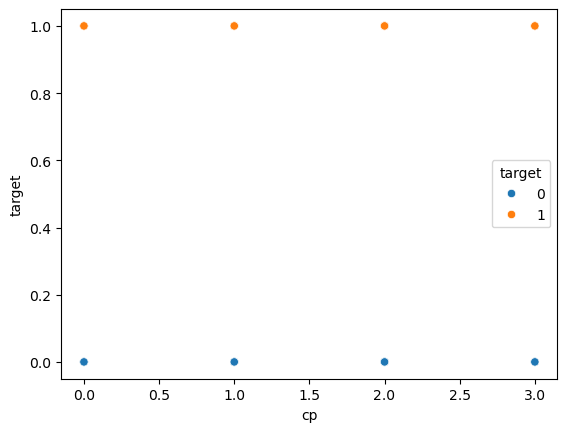

In [27]:
sns.scatterplot(data = df, x='cp',y='target',hue= 'target')
plt.show()

In [28]:
y_pred = model_lr.predict(X_test)
#yy-pred

In [29]:
#5.1.2: import model evaluation metrics
# it will be called only when problem is of classification
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report

In [30]:
# 5.1.3 Import confusion Matrix to Evaluate claasificationModel
from sklearn.metrics import confusion_matrix

In [31]:
# Eoor: camparion: if Score tie
# Type1, Type2:type 1 error danger

In [32]:
cm = confusion_matrix(y_test,y_pred)

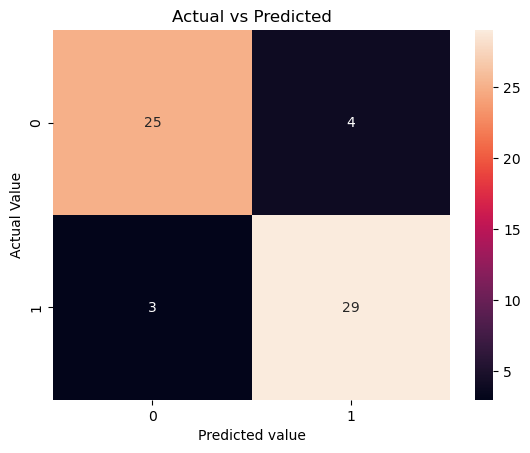

In [33]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

In [34]:
TN,FP,FN,TP = cm.ravel()

In [35]:
precision_score(y_test,y_pred)

0.8787878787878788

In [36]:
lr_score = accuracy_score(y_test,y_pred)

In [77]:
# F1 score to Evaluate both precision and recall score

In [45]:
f1_sc = f1_score(y_test,y_pred)

In [46]:
print('F1 score: ',f1_sc)

F1 score:  0.8923076923076924


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [80]:
# 5.1.4 Checking Model Score
model_lr.score(X_test,y_test)

0.8852459016393442

### Step 5.2: Naive Bayes ML Model 

In [81]:
# pre assumption: It will pre-assume No correlation b/w features

###### Step 5.2.1 Import Navive Model

In [38]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNP: only be use in case of Multi class classification

model_nv = GaussianNB()
model_nv.fit(X_train,y_train)  # Train part/learning


GaussianNB()

In [39]:
y_pred = model_nv.predict(X_test)

In [40]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score: ', nv_score)

Naive Bayes Score:  0.8688524590163934


In [41]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))
nv_score = accuracy_score(y_test,y_pred)

Accuracy Score 0.8688524590163934
Precision Score 0.9
Recall Score 0.84375
F1 Score 0.8709677419354839


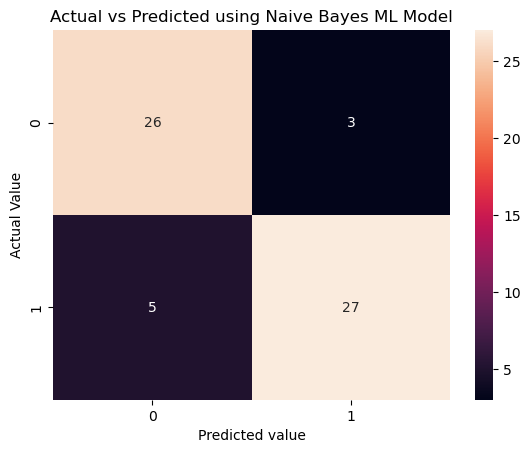

In [42]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

In [87]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Step 5.3: Support Vector machine ML Model

In [88]:
# SVM works on support vectors of nearest data points of different classes
# it will create line, plane, hyperplane
# we can use this for both regression problems and classification problems 


###### Step 5.3.1: Import Module

In [44]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2: Predict X_test

In [45]:
y_pred = model_svc.predict(X_test)

###### Step 5.3.5: Checking Scores and Confusion Matrix

In [46]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.7049180327868853
Precision Score 0.6666666666666666
Recall Score 0.875
F1 Score 0.7567567567567568


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



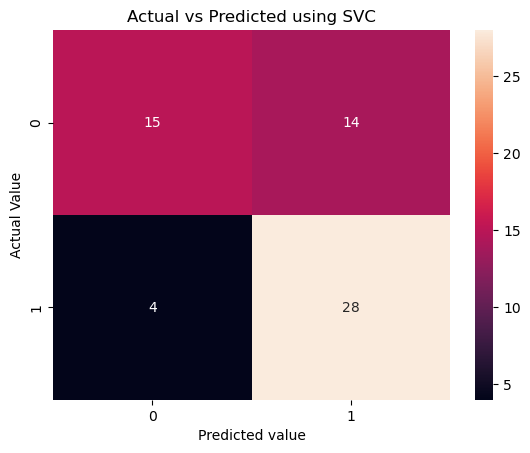

In [48]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using SVC')
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

In [49]:
svm_score = accuracy_score(y_test,y_pred)

In [50]:
lr_score

0.8852459016393442

In [51]:
nv_score

0.8688524590163934

In [52]:
svm_score

0.7049180327868853

## Step 5.4: Decision Tree ML Model

In [53]:
# IRIS flower: Sepal length, Petal length, Petal width, Sepal Width
# Specied: Versicolor, Setosa, Virginica

###### Step 5.4.1: Impoert Desicion Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step 5.4.2: Predict y_pred

In [56]:
y_pred = model_dt.predict(X_test)

In [57]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.8524590163934426
Precision Score 0.9259259259259259
Recall Score 0.78125
F1 Score 0.847457627118644


In [58]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.8524590163934426

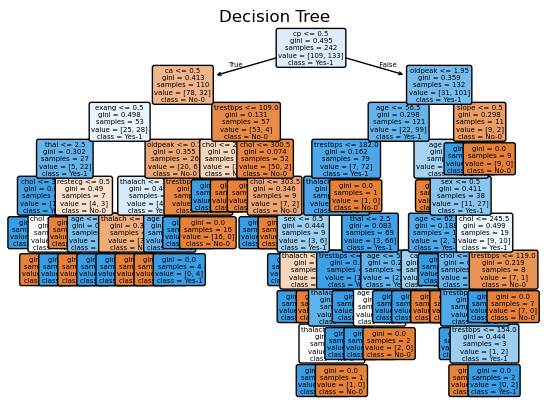

In [59]:
from sklearn.tree import plot_tree
plot_tree(model_dt,
          feature_names = X.columns,
          class_names = ['No-0','Yes-1'],
          filled = True,
          rounded = True,
          fontsize = 5)
plt.title('Decision Tree')
plt.show()

## Step 5.5: Ensemble ML Model
- Bagging Technique: Bages of Multiple ML model, and each model give it's prediction/classification, final outcome based on majority.
- Boosting Technique: Next model learn from previous model and boost it minimize error to improve score 

#### Step 5.5.1: Bagging Technique Model >> Random Forest ML Model

In [60]:
# Random Forest: bags of Multiple Desicion Tress()
# Default Tress = 100
# Bagging technique(Ensemble)

In [61]:
# Random Forest regression problem: Avg of Final Value>>2.2+2.4+2.5>>25
# Random Forest classification>>BInary Multiclass classification>>Majority Voting

#### Step 5.5.2 Import Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

###### Step 5.5.3: y_pred prediction based on X_test

In [63]:
y_pred = model_rf.predict(X_test)

In [64]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.8688524590163934
Precision Score 0.875
Recall Score 0.875
F1 Score 0.875


In [65]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8688524590163934

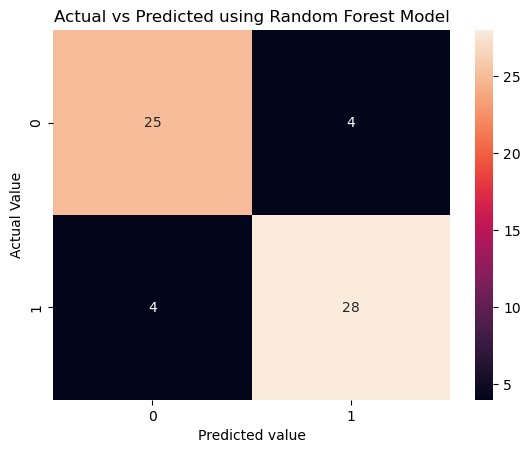

In [66]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Random Forest Model')
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

#### Ensemble Boosting Technique: Adaboost, Gradienntboost, XGboost

###### Step 5.6.1: Import XGbooat


In [67]:
# pip install xgboost

In [68]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
y_pred = model_xgb.predict(X_test)

In [70]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

# KNN: 

## Step 5.7.1: import KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [73]:
y_pred = model_knn.predict(X_test)

In [74]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

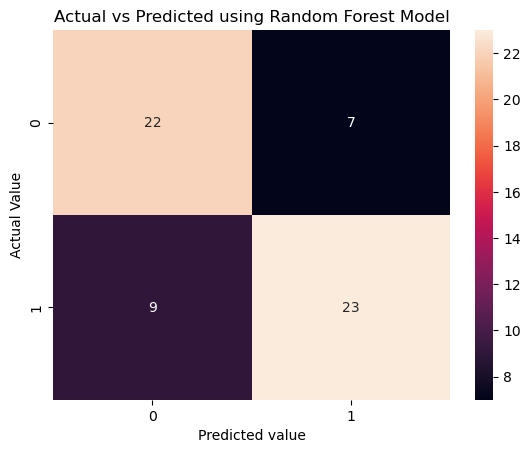

In [75]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Random Forest Model')
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

## Step 5.8: Artificial Neural Network using Deep Learning

In [154]:

# ML works only on Limited Data
# If Input changes ML Model Fail(8 features col: 8)

In [156]:
# Deep Learning: dense(Deep) neural network: trained on multiple possibilities

In [157]:
#keras tensol flow:
# tensors: array 

## Step 5.8.1: ANN Model Creation

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [1]:
pip install keras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 547.4 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 547.4 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 547.4 kB/s eta 0:00:02
   ---------------------- ----------------- 0.8/1.4 MB 512.3 kB/s eta 0:00:02
   ---------------------- ----------------- 0.8/1.4 MB 512.3 kB/s eta 0:00:02
   ----------------------------- ---------- 1.0/1.4 MB 510.4 kB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 510.4 kB/s eta 0:00:01
   -------------------------------------

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 13))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss= 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
print('Done')


Done


In [16]:
# 5.8.3 Model training
model.fit(X_train,y_train,epochs = 300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4504 - loss: 30.5964
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4504 - loss: 24.4060
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4504 - loss: 18.2453
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4504 - loss: 12.6286
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4504 - loss: 7.1916
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5083 - loss: 2.3665
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5785 - loss: 1.1874
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5496 - loss: 1.2867
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6322 - loss: 0.7272
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6074 - loss: 0.7699
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6488 - loss: 0.6699
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6488 

In [17]:
y_pred = model.predict(X_test)
y_pred = [round(i[0]) for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [23]:
from sklearn.metrics import accuracy_score
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8688524590163934

# Step 6: All Model Comparison

In [77]:
all_model_score = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','KNN','ANN']
print(len(all_model_score))

8


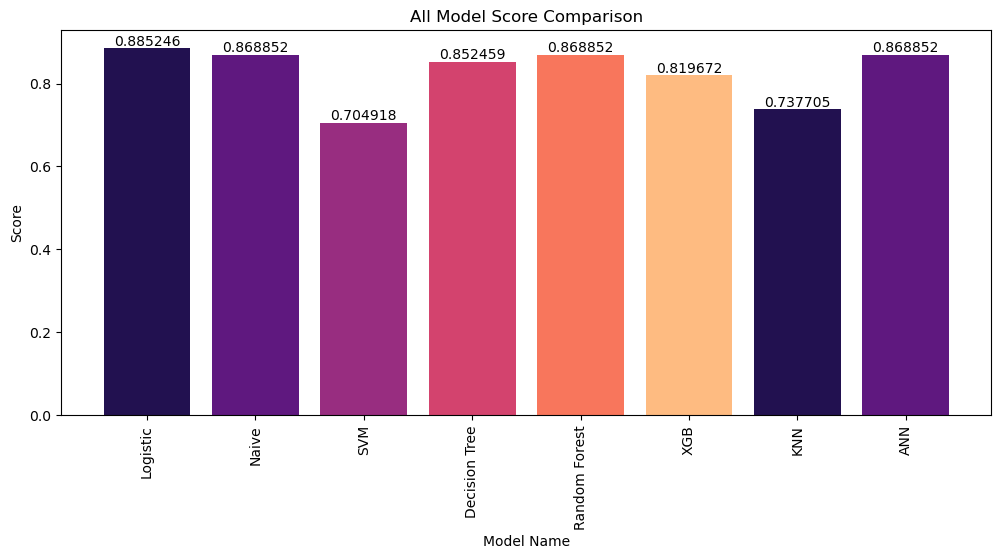

In [79]:
plt.figure(figsize = (12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height = all_model_score, color = sns.color_palette('magma'))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 90)
plt.show()

# Step 7: Final Best Model Save

In [80]:
# lr has highest score so that Final Model is logistic Regression

In [81]:
import pickle
with open ('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [84]:
import os
os.getcwd()

'C:\\Users\\anjna\\Heart Disease prediction'